In [119]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()



## Loading the raw data 

In [120]:
raw_data= pd.read_csv(r"C:\Users\ohkba\Downloads\car data (1).csv")
raw_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Preprocessing

In [121]:
## Exploring the descriptive statistics of the variables

In [122]:
raw_data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### Determining the variables of interest

In [123]:
# as there are 98 unique values of the car name means there would be n-1 dummies i.e 97 dummnies, these much of dummies would provide much of variability to the data set
data = raw_data.drop(['Car_Name'],axis=1) 
data.describe(include='all')

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,NaN,NaN,NaN,NaN,3,2,2,NaN
top,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [124]:
#Dealing with missing values
data.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

The above indicates that there is no null value present in dataset

In [125]:
# Checking for any dublicates in the data set
data.duplicated().sum()

2

In [126]:
data_no_dup=data.drop_duplicates() # Removing 2 dublicates 

In [127]:
data_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Driven_kms     299 non-null    int64  
 4   Fuel_Type      299 non-null    object 
 5   Selling_type   299 non-null    object 
 6   Transmission   299 non-null    object 
 7   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB


In [128]:
data_no_dup.describe(include='all')

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,299.000000,299.000000,299.000000,299.000000,299,299,299,299.000000
unique,NaN,NaN,NaN,NaN,3,2,2,NaN
top,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,NaN,NaN,NaN,NaN,239,193,260,NaN
mean,2013.615385,4.589632,7.541037,36916.752508,NaN,NaN,NaN,0.043478
std,2.896868,4.984240,8.566332,39015.170352,NaN,NaN,NaN,0.248720
min,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,NaN,NaN,NaN,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,NaN,NaN,NaN,0.000000


In [129]:
data = data_no_dup
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Exploring the PDFs of the Features

A great step in the data exploration is to display the probability distribution function (PDF) of a variable

The PDF will show us how that variable is distributed 

This makes it very easy to spot anomalies, such as outliers

The PDF is often the basis on which we decide whether we want to transform a feature

<AxesSubplot:xlabel='Year', ylabel='Density'>

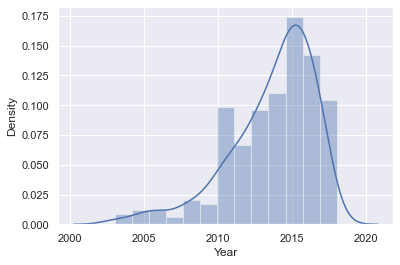

In [130]:
sns.distplot(data['Year'])

In [131]:
q = data['Year'].quantile(0.01)
data1=data[data['Year']>q]

<AxesSubplot:xlabel='Year', ylabel='Density'>

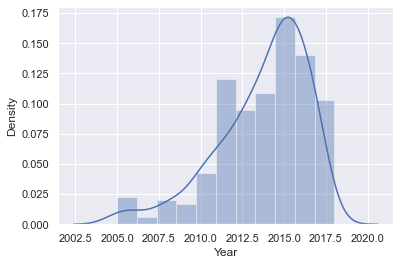

In [132]:
sns.distplot(data1['Year'])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

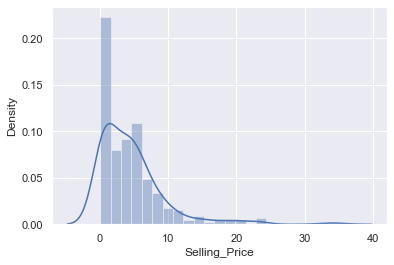

In [133]:
sns.distplot(data1['Selling_Price'])

In [134]:
q= data1['Selling_Price'].quantile(0.99)
data2=data1[data1['Selling_Price']<q]

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

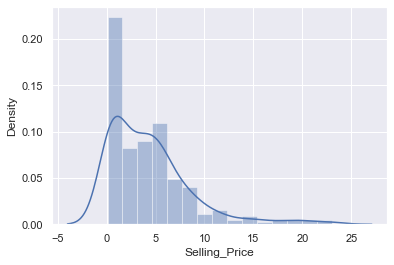

In [135]:
sns.distplot(data2['Selling_Price'])

<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

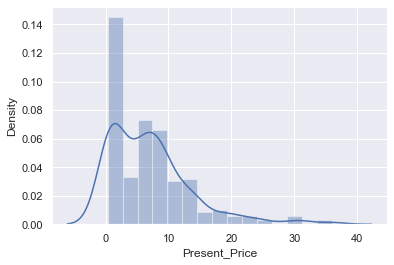

In [136]:
sns.distplot(data2['Present_Price'])

In [137]:
q= data2['Present_Price'].quantile(0.99)
data3 = data2[data2['Present_Price']<q]

<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

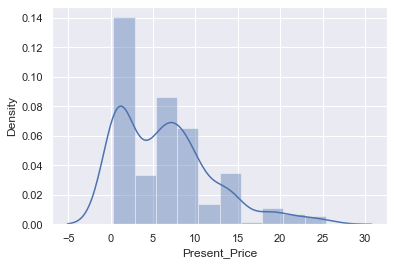

In [138]:
sns.distplot(data3['Present_Price'])

<AxesSubplot:xlabel='Driven_kms', ylabel='Density'>

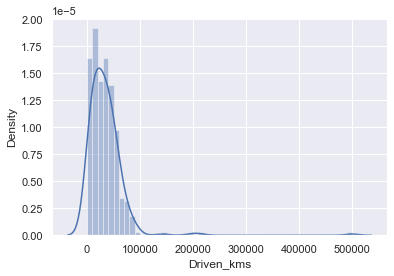

In [139]:
sns.distplot(data3['Driven_kms'])

<AxesSubplot:xlabel='Driven_kms', ylabel='Density'>

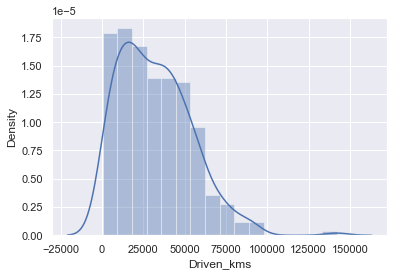

In [140]:
q=data3['Driven_kms'].quantile(0.99)  
data4=data3[data3['Driven_kms']<q]
sns.distplot(data4['Driven_kms'])

In [141]:
data4.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [142]:
#we can observe that 'owner' column won't be significant in the prediction of 'Selling_Price', so we drop it.
data_cleaned=data4.drop(columns= 'Owner', axis=1)

In [143]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it 
# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned.reset_index(drop=True,inplace=True)

In [144]:
data_cleaned.describe(include='all')

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
count,284.000000,284.000000,284.000000,284.000000,284,284,284
unique,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual
freq,NaN,NaN,NaN,NaN,234,182,255
mean,2013.788732,4.104190,6.542183,32341.802817,NaN,NaN,NaN
std,2.672543,3.789163,5.575481,21982.124471,NaN,NaN,NaN
min,2005.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN
25%,2012.000000,0.795000,1.140000,15000.000000,NaN,NaN,NaN
50%,2014.500000,3.500000,5.900000,30000.000000,NaN,NaN,NaN
75%,2016.000000,5.850000,9.400000,45128.500000,NaN,NaN,NaN


In [145]:
#now all min-max and pdfs look fine, we've dropped the insignificant column and removed null/missing values
#we have preprocssed data and deleted about 23 observations.

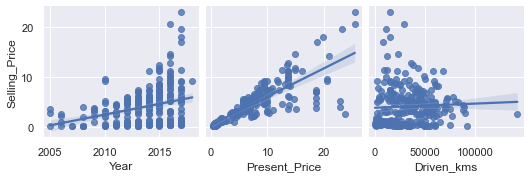

In [146]:
## Checking the OLS assumptions
sns.pairplot(data_cleaned, x_vars=["Year", "Present_Price", "Driven_kms"], y_vars="Selling_Price", kind="reg")


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

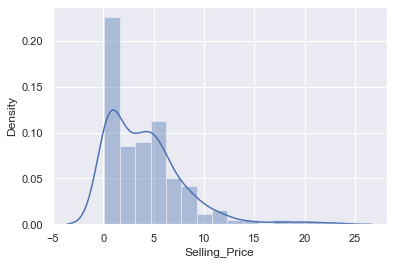

In [147]:
# From the subplots and the PDF of price, we can easily determine that 'Selling_Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Selling_Price'])

In [148]:
### Relaxing the assumptions

In [149]:
# Let's transform 'Selling_Price' with a log transformation
log_Selling_Price = np.log(data_cleaned['Selling_Price'])

# Then we add it to our data frame
data_cleaned['log_Selling_Price'] = log_Selling_Price
data_cleaned

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,log_Selling_Price
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,1.208960
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,1.558145
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,1.981001
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1.047319
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,1.526056
...,...,...,...,...,...,...,...,...
279,2016,9.50,11.60,33988,Diesel,Dealer,Manual,2.251292
280,2015,4.00,5.90,60000,Petrol,Dealer,Manual,1.386294
281,2009,3.35,11.00,87934,Petrol,Dealer,Manual,1.208960
282,2017,11.50,12.50,9000,Diesel,Dealer,Manual,2.442347


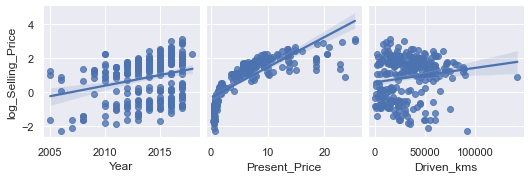

In [150]:
sns.pairplot(data_cleaned, x_vars=["Year", "Present_Price", "Driven_kms"], y_vars="log_Selling_Price", kind="reg")


In [151]:
data_cleaned1 = data_cleaned
data_cleaned1 = data_cleaned1.drop(['Selling_Price'], axis=1)

In [152]:
#changing categorical variables to numerical format

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
car_vars = data_cleaned1.select_dtypes('O').columns #to select all columns of object type
for col in car_vars:
    data_cleaned1[col] = encoder.fit_transform(data_cleaned[col])
    
data_cleaned1.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,log_Selling_Price
0,2014,5.59,27000,2,0,1,1.208960
1,2013,9.54,43000,1,0,1,1.558145
2,2017,9.85,6900,2,0,1,1.981001
3,2011,4.15,5200,2,0,1,1.047319
4,2014,6.87,42450,1,0,1,1.526056


In [153]:

#to check for multicollinearity among independent/dependent variables, we check throuh heatmap and 
#VIF(variance inflayion factor)

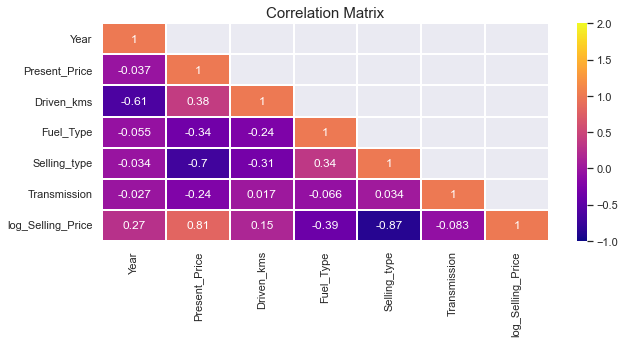

In [154]:
cor =data_cleaned1.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned1[['Year','Driven_kms','Present_Price']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [156]:
vif

,VIF,features
0,3.601606,Year
1,3.712190,Driven_kms
2,2.793405,Present_Price


In [157]:
# Rearrange a bit
data_cleaned1.columns.values

array(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'log_Selling_Price'], dtype=object)

In [158]:
cols = [ 'log_Selling_Price', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission']
data_preprocessed = data_cleaned1[cols]
data_preprocessed.head()

,log_Selling_Price,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,1.208960,2014,5.59,27000,2,0,1
1,1.558145,2013,9.54,43000,1,0,1
2,1.981001,2017,9.85,6900,2,0,1
3,1.047319,2011,4.15,5200,2,0,1
4,1.526056,2014,6.87,42450,1,0,1


## Building Linear Regression Model


In [159]:
target = data_preprocessed['log_Selling_Price']
inputs= data_preprocessed.drop(['log_Selling_Price'], axis=1)

In [160]:
#Scale data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [161]:
inputs_scaled = scaler.transform(inputs)

In [162]:
#Train - Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [163]:
#Create the Regression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [164]:
# lets store the predict values of TRAIN data
y_hat = reg.predict(x_train)

Text(0.5, 1.0, 'Residuals PDF')

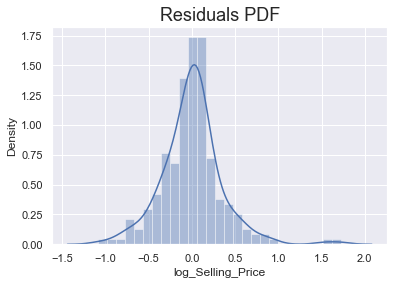

In [165]:
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed


In [166]:
#the above visualization also verifies the ASSUMPTION that errors are normally distributed,mean is 0


In [167]:
reg.score(x_train, y_train)

0.9240760743992175

In [168]:
#R-squared is around 92% so our model explains around 92% of variability of data


In [169]:
data_preprocessed.head()

,log_Selling_Price,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,1.208960,2014,5.59,27000,2,0,1
1,1.558145,2013,9.54,43000,1,0,1
2,1.981001,2017,9.85,6900,2,0,1
3,1.047319,2011,4.15,5200,2,0,1
4,1.526056,2014,6.87,42450,1,0,1


In [170]:
#finding weight and bias 
print('Intercept : ', reg.intercept_)
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Intercept :  0.8454156001145507


,Features,Weights
0,Year,0.249729
1,Present_Price,0.583556
2,Driven_kms,-0.073048
3,Fuel_Type,-0.045974
4,Selling_type,-0.691735
5,Transmission,0.047788


In [171]:
# for Continuous variables,a positive weight shows that as feature increases its value,so does 'log_Selling_Price/Selling_Price'
# a negative weight shows that as feature increases its value,'log_Selling_Price/Selling_Price' decrease.

# for Categorical variables,a poitive weight shows that the respective category is more expensive than the benchmak
# a negative weight shows that the respective category is less expensive than the benchmak

## Testing


In [172]:
y_hat_test = reg.predict(x_test)

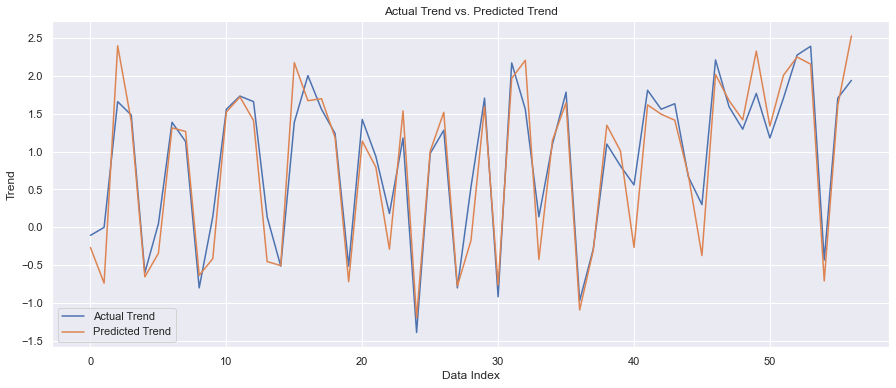

In [173]:
#let's compare target(actual) and predicted values using trend-lines
plt.figure(figsize=(15, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_hat_test, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()

In [174]:
#calculating R-squared for testing data
reg.score(x_test, y_test)

0.8676566106133925

### R-squared is around 86.7% ~ 87%, so our model explains around 87% of variability of data